# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [1]:
student_number = 400104891
full_name = "Erfan Jafari"
assert student_number and full_name is not None, 'pls input your information'

# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [3]:
data = pd.read_csv('nutrition.csv')
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [5]:
non_numeric_df = data.select_dtypes(exclude=[np.float64])
print("Non-numeric features:")
numeric_df = data.select_dtypes(include=[np.float64])
numeric_df.head()

Non-numeric features:


,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

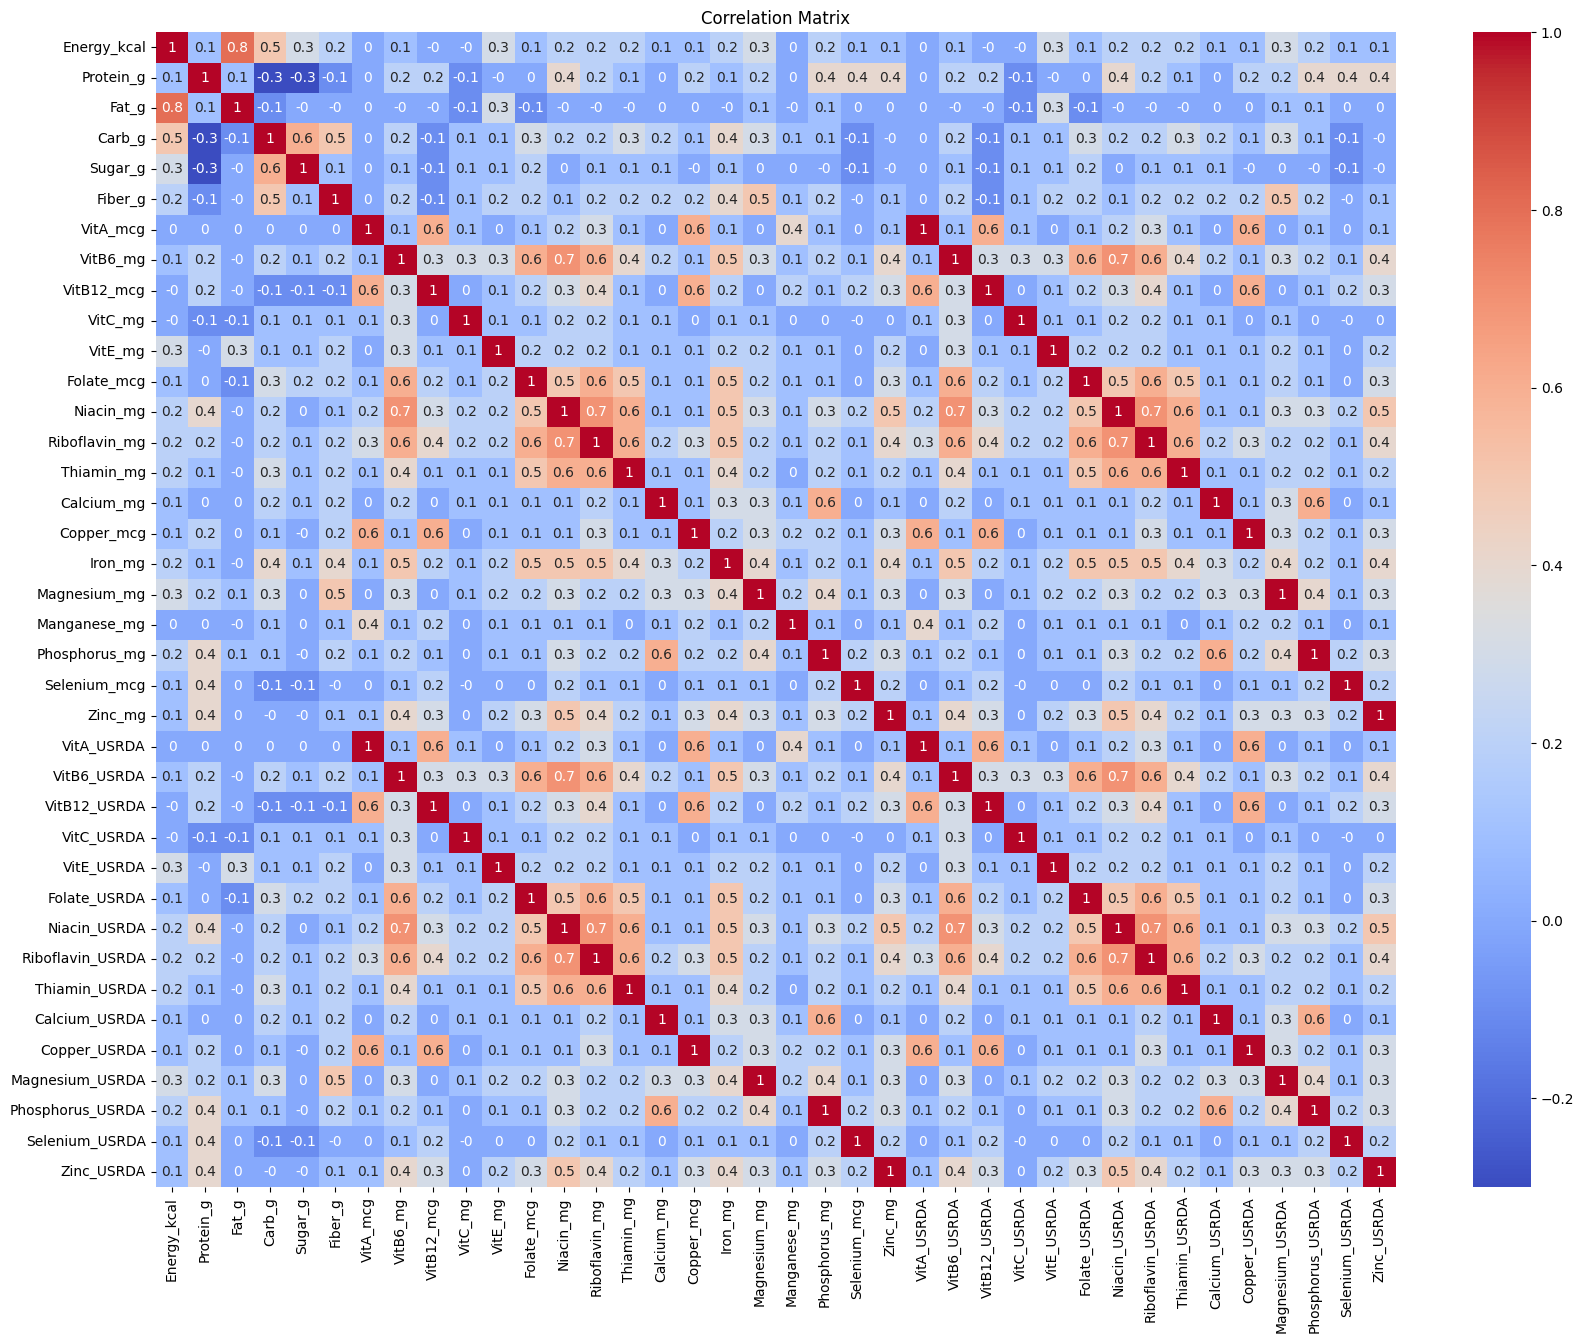

In [6]:
corr_matrix = round(numeric_df.corr(), 1)

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

Redundant features (correlation > 0.8): {'VitB6_USRDA', 'VitA_USRDA', 'Riboflavin_USRDA', 'Calcium_USRDA', 'Selenium_USRDA', 'VitE_USRDA', 'VitC_USRDA', 'VitB12_USRDA', 'Thiamin_USRDA', 'Copper_USRDA', 'Phosphorus_USRDA', 'Magnesium_USRDA', 'Zinc_USRDA', 'Niacin_USRDA', 'Folate_USRDA'}


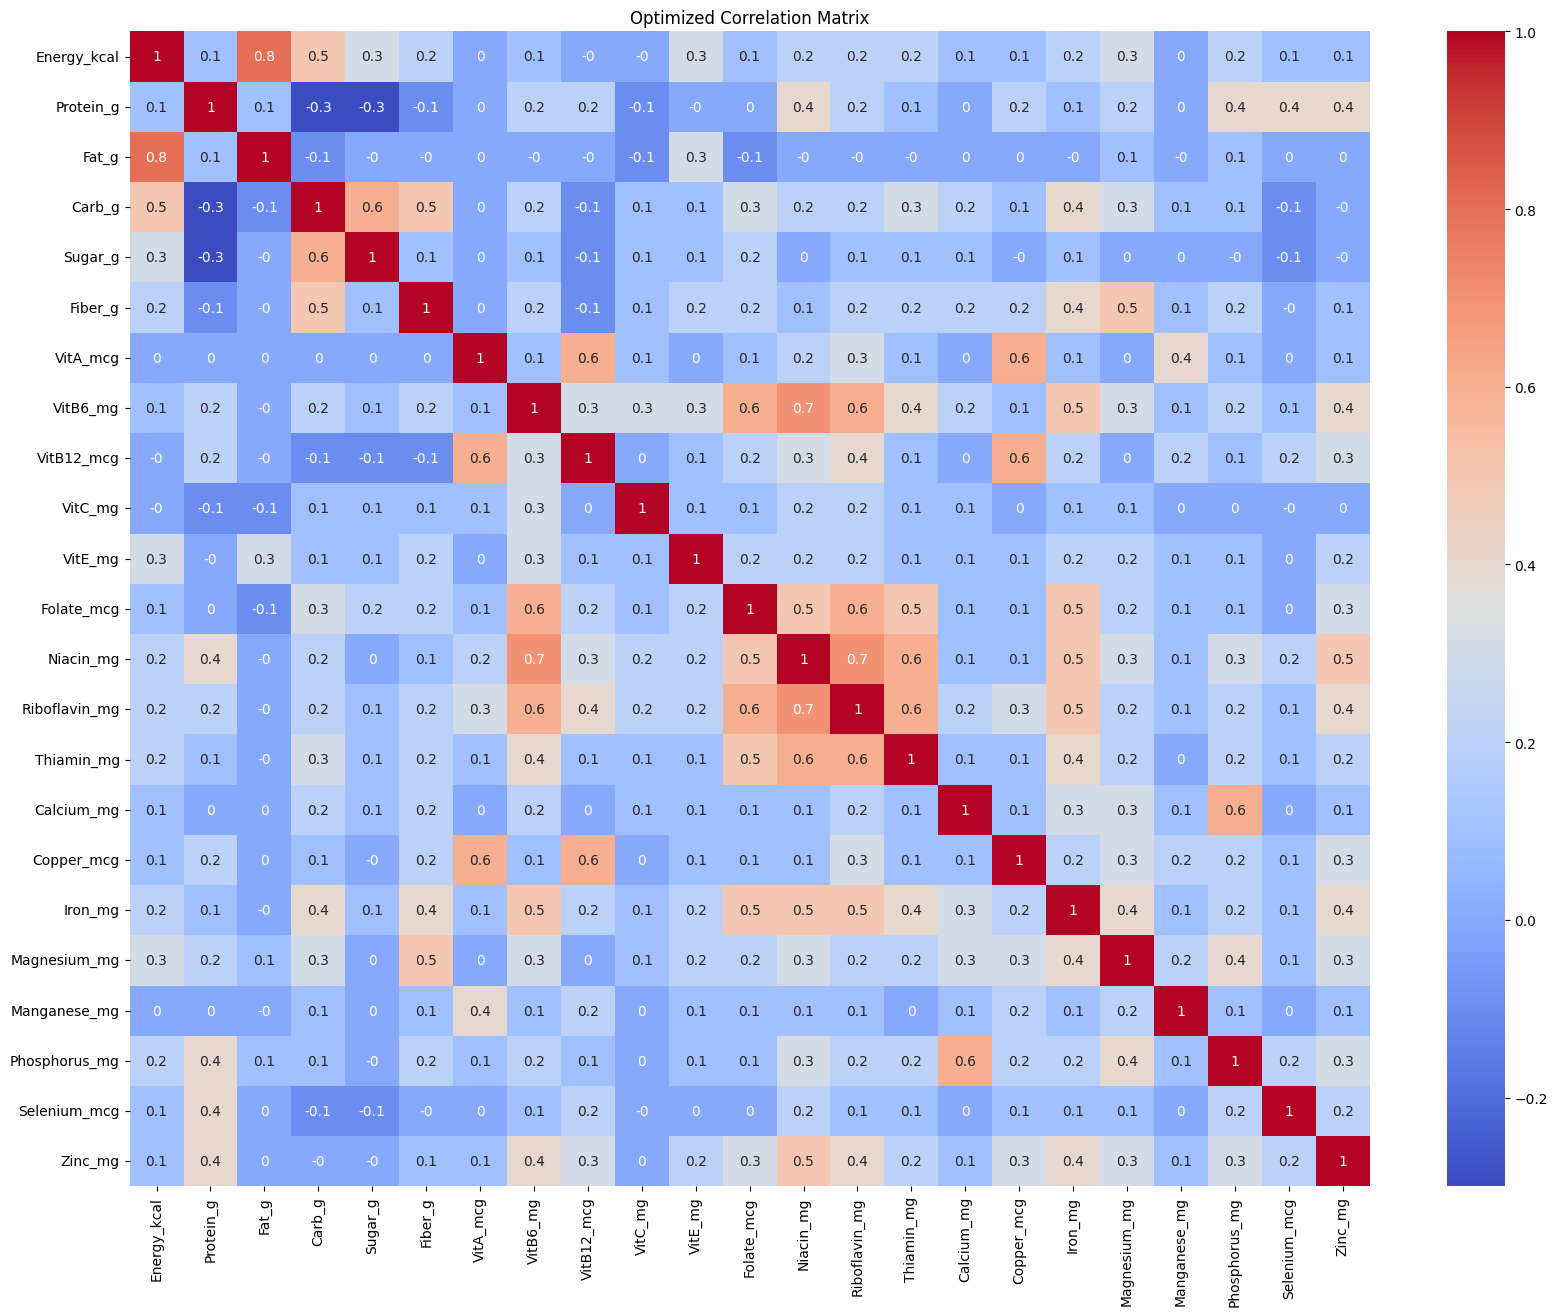

In [7]:
threshold = 0.8
redundant_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            redundant_features.add(corr_matrix.columns[i])

print("Redundant features (correlation > 0.8):", redundant_features)

optimized_numeric_df = numeric_df.drop(columns=redundant_features)

opt_corr_matrix = round(optimized_numeric_df.corr(), 1)
plt.figure(figsize=(20, 15))
sns.heatmap(opt_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Optimized Correlation Matrix')
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

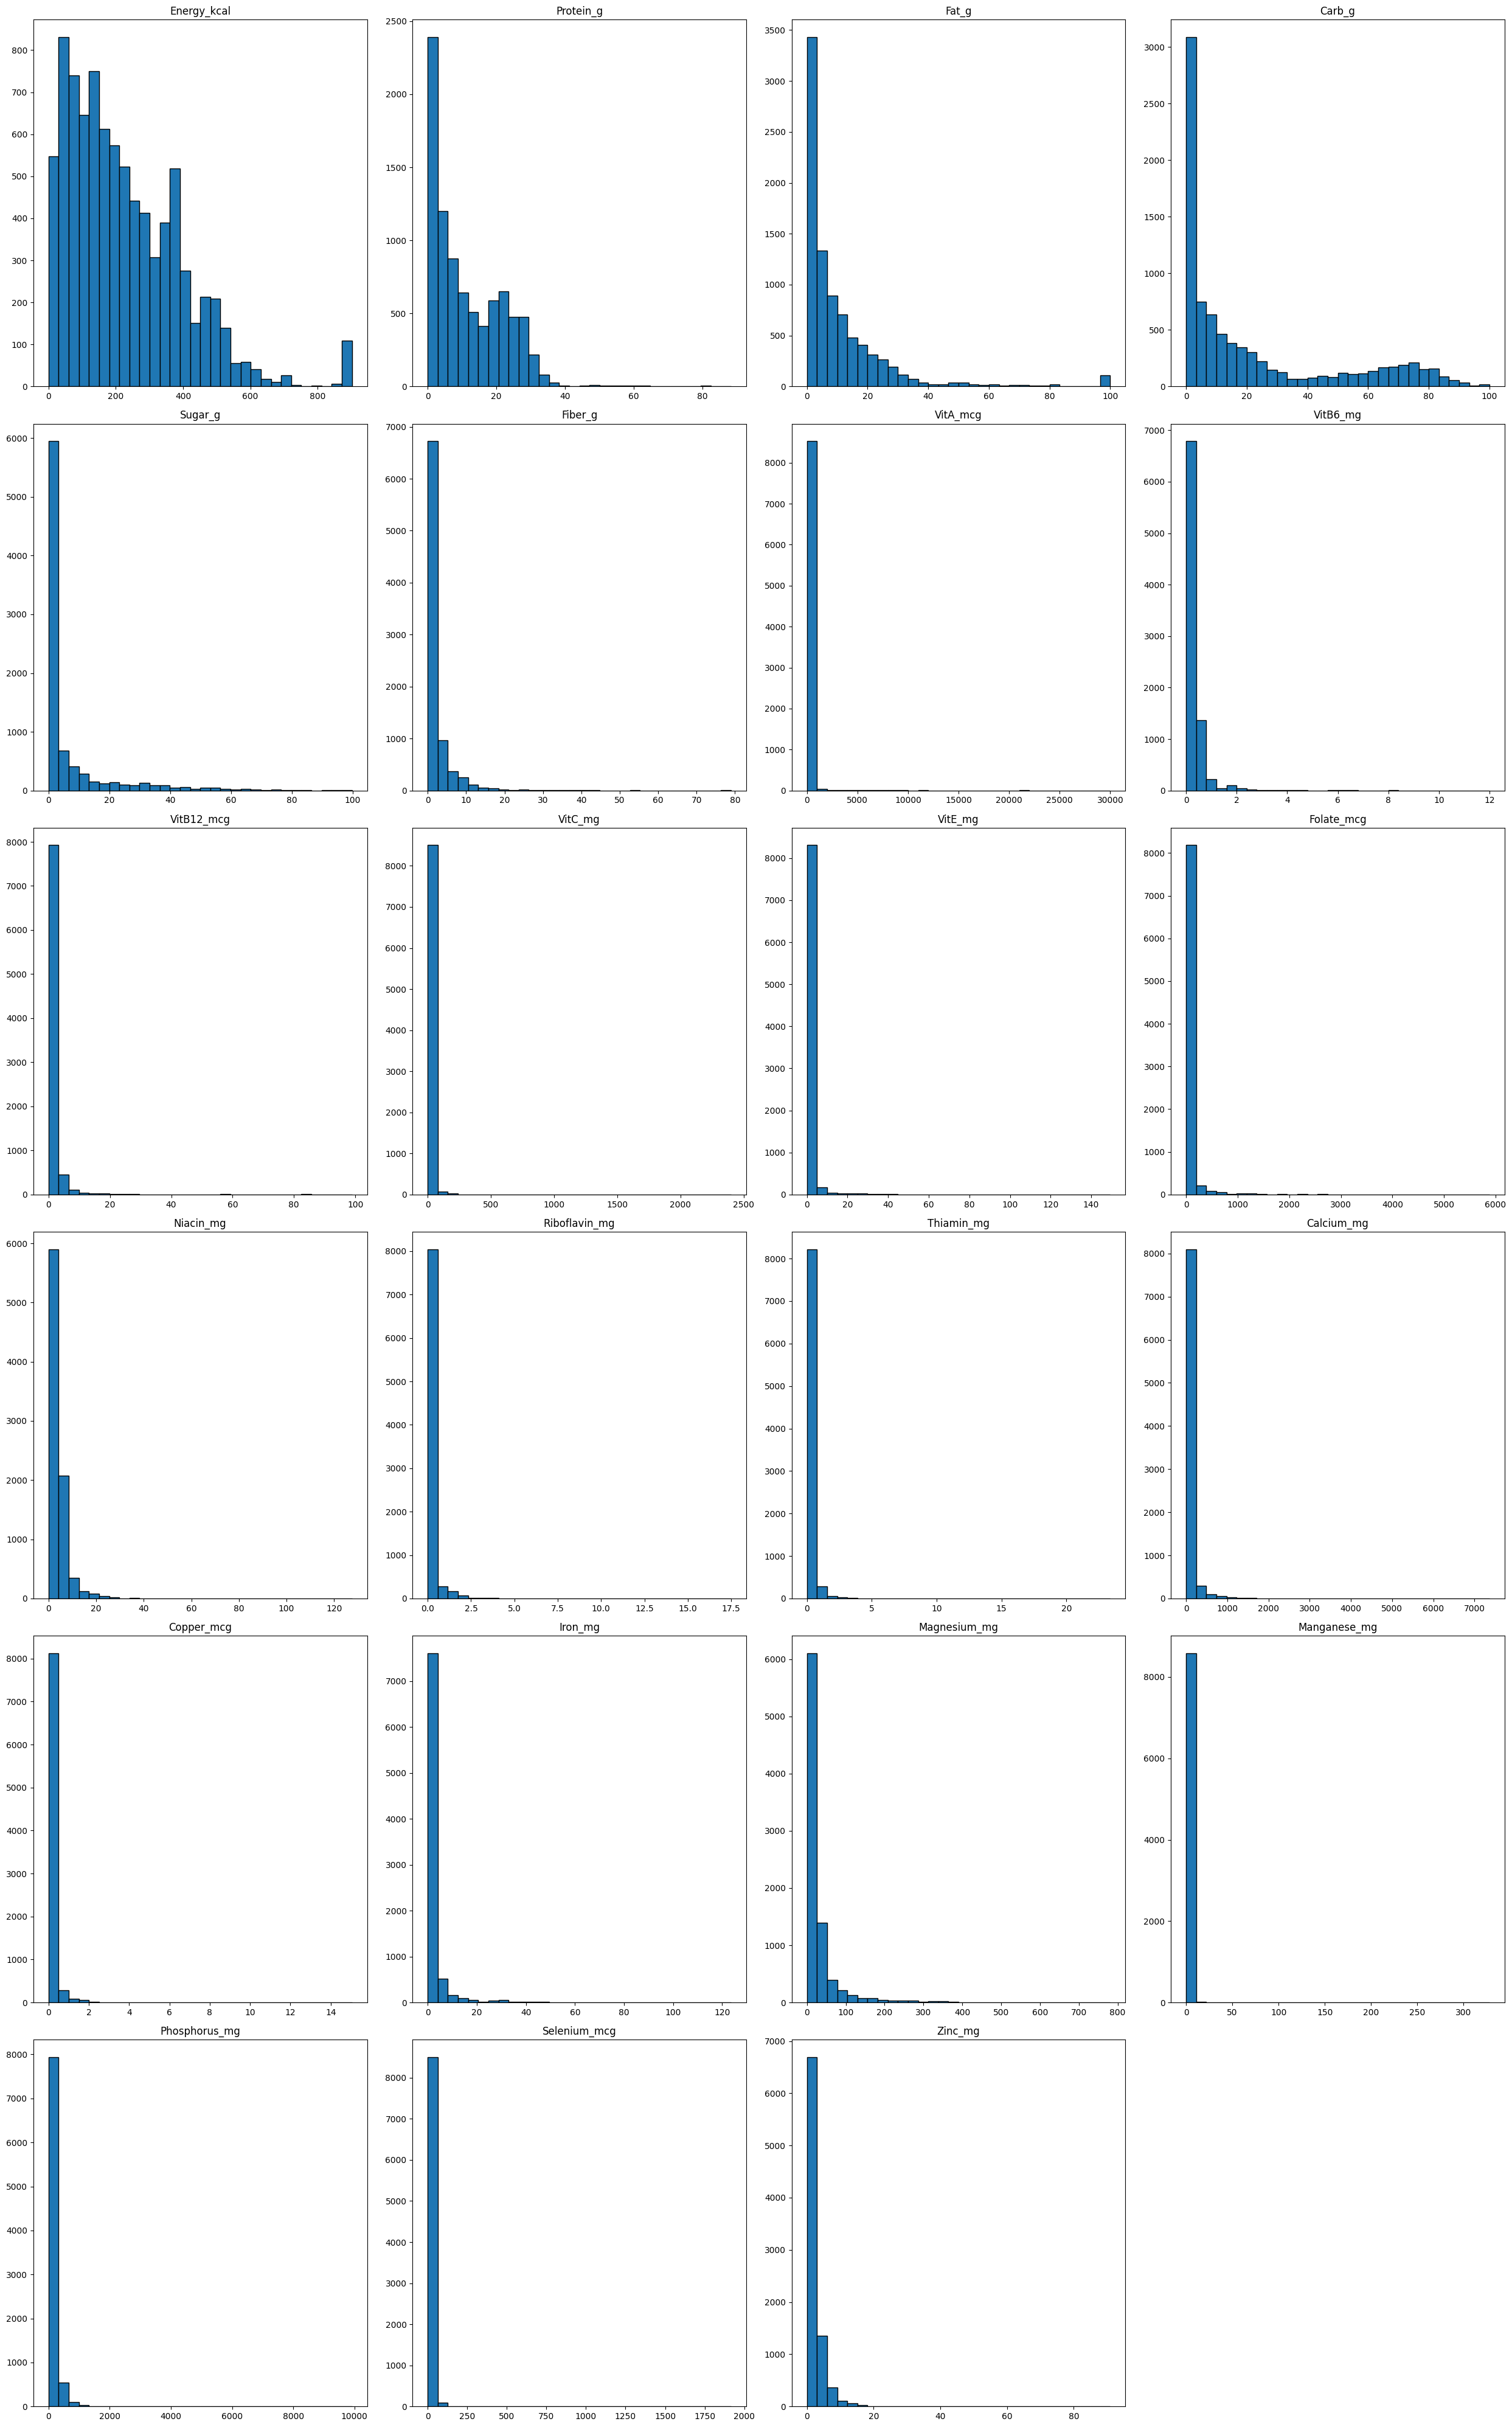

In [8]:
plt.figure(figsize=(25, 40))

for i, col in enumerate(optimized_numeric_df.columns):
    plt.subplot(len(optimized_numeric_df.columns) // 4 + 1, 4, i + 1)
    plt.hist(optimized_numeric_df[col], bins=30, edgecolor='black')
    plt.title(col)

plt.tight_layout()
plt.show()


We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [9]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
box_opt_numeric_df = optimized_numeric_df + 1

df_boxcoxed = pd.DataFrame(index=box_opt_numeric_df.index)

for col in box_opt_numeric_df.columns:
    transformed_data, _ = boxcox(box_opt_numeric_df[col])
    df_boxcoxed[f"{col}_boxcoxed"] = transformed_data


Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

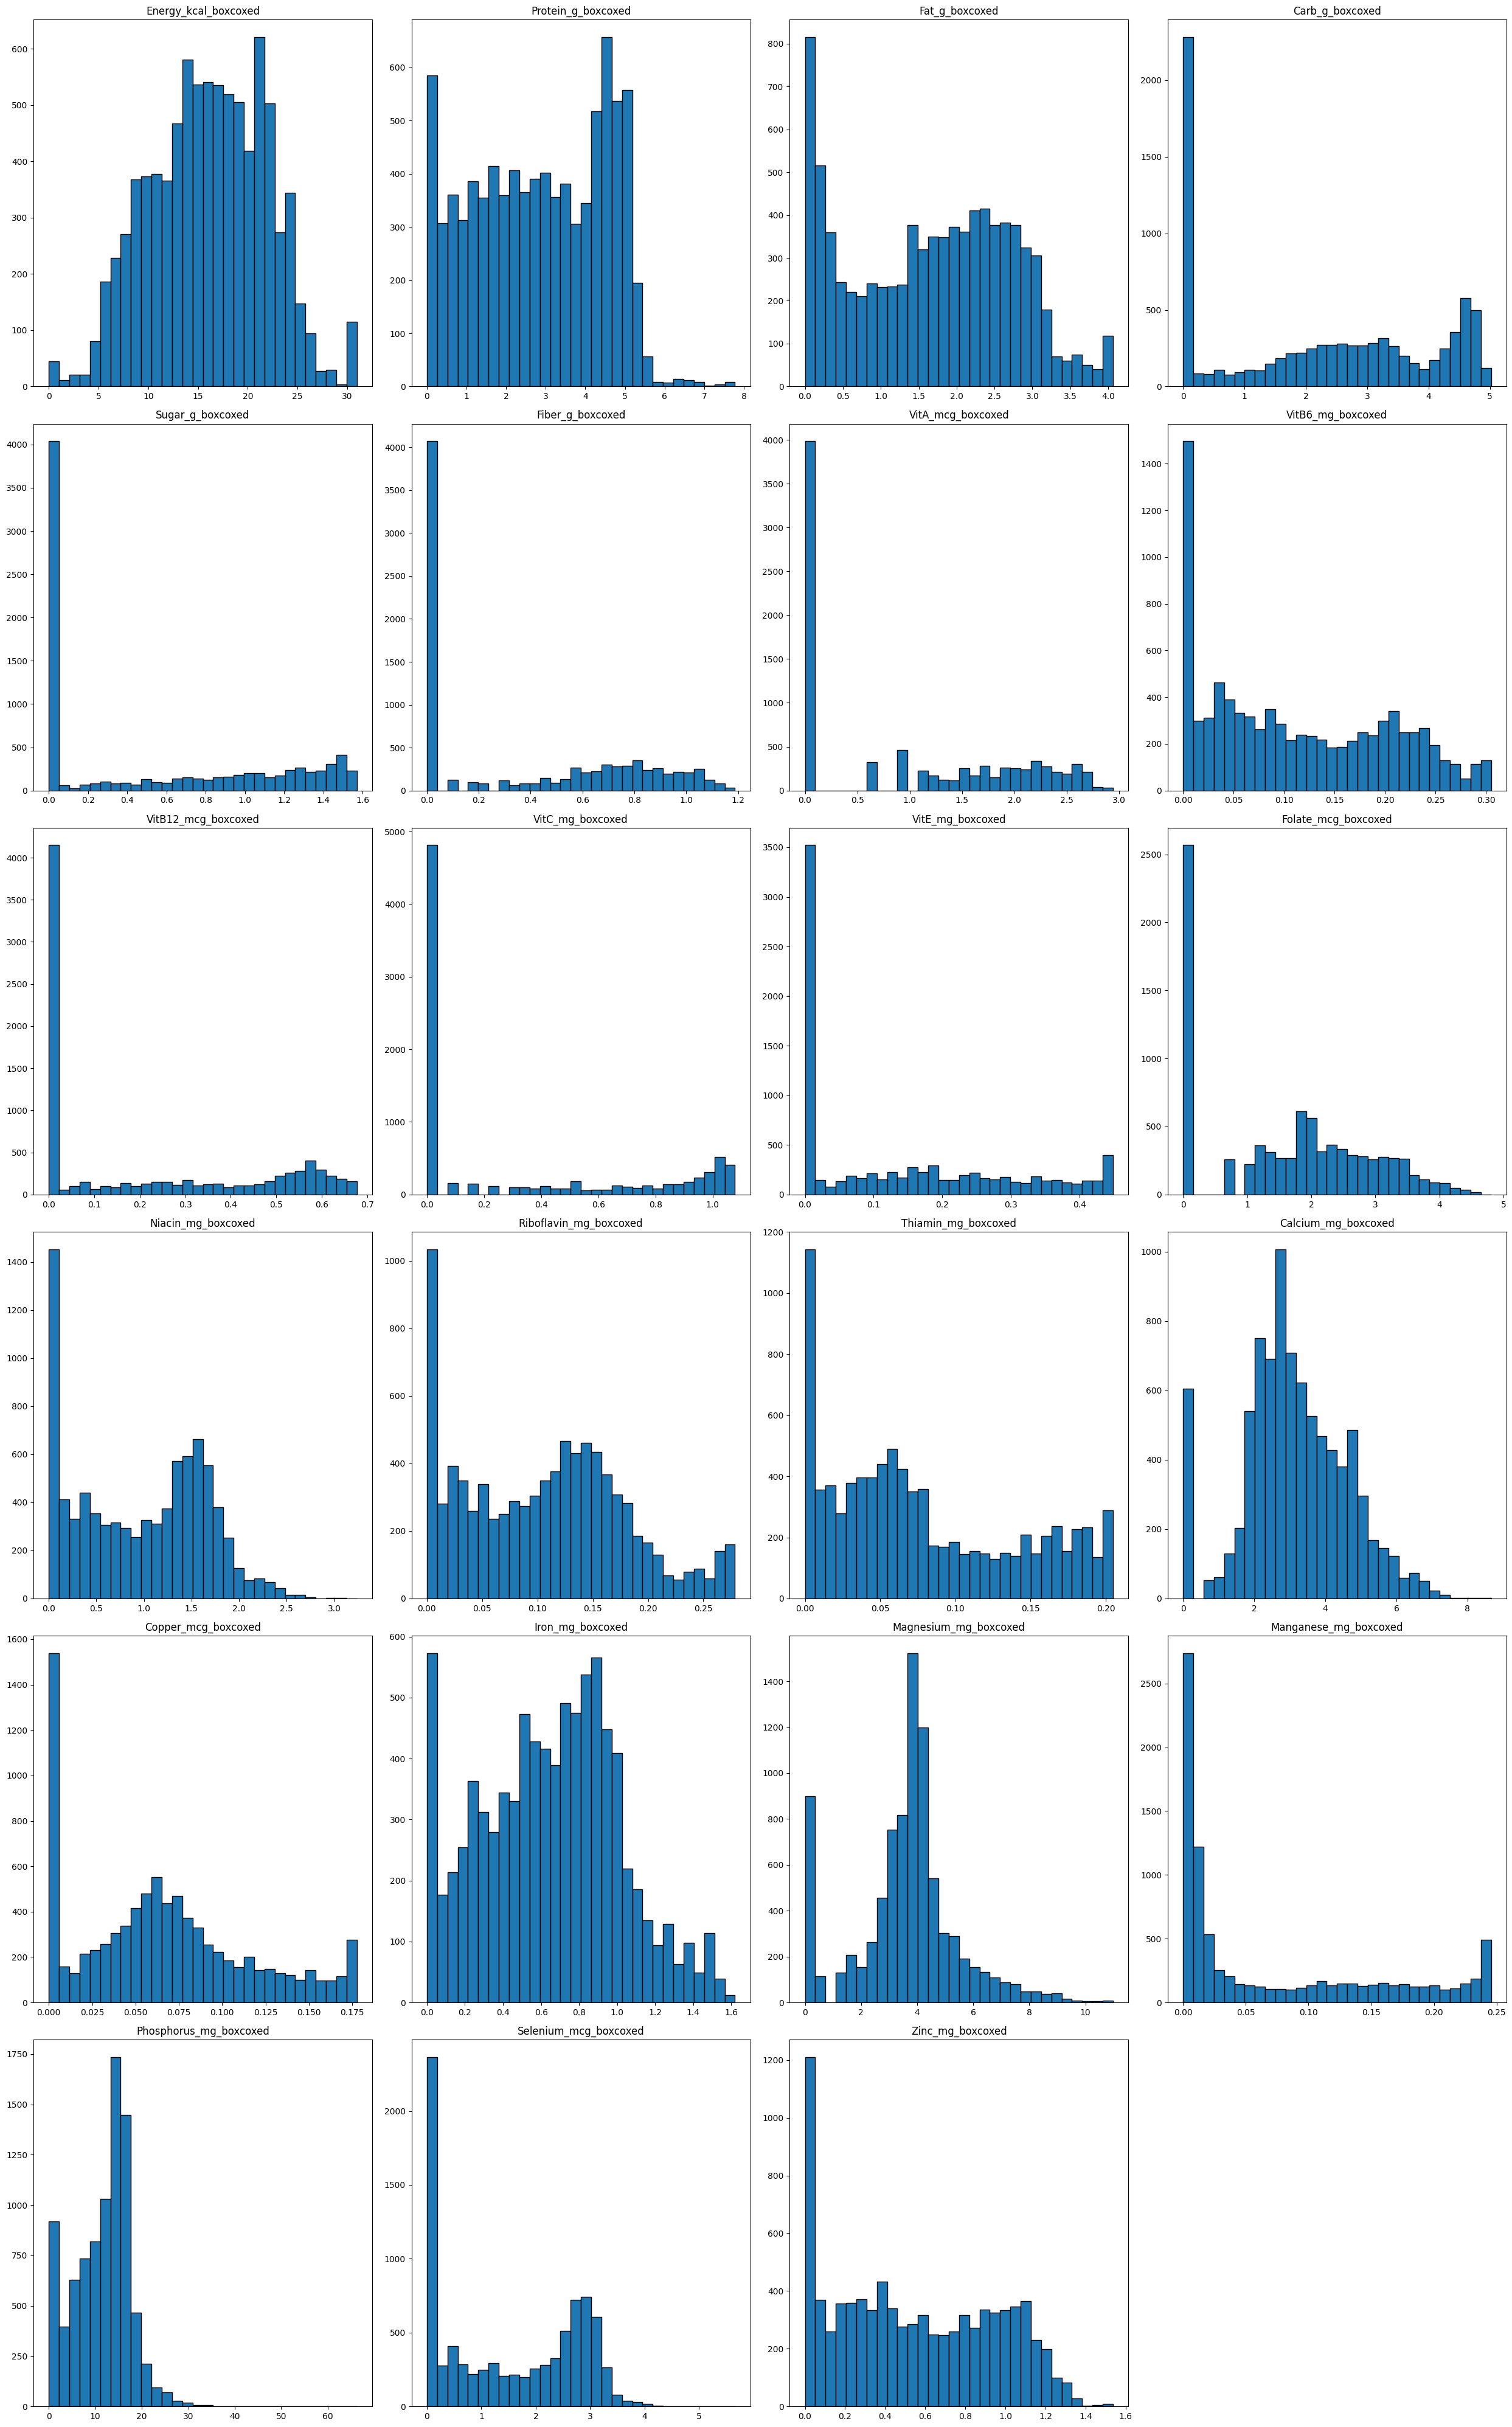

In [10]:
plt.figure(figsize=(25, 40))

for i, col in enumerate(df_boxcoxed.columns):
    plt.subplot(len(df_boxcoxed.columns) // 4 + 1, 4, i + 1)
    plt.hist(df_boxcoxed[col], bins=30, edgecolor='black')
    plt.title(col)

plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [11]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_boxcoxed), columns=df_boxcoxed.columns)
total_mean = df_standardized.mean().mean()
total_std = df_standardized.stack().std()
print(f"total mean: {total_mean}")
print(f"total standard deviation of standardized data: {total_std}")

total mean: -1.4876609893369881e-18
total standard deviation of standardized data: 1.0000025225357034


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [12]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        cov_matrix = np.cov(X_centered, rowvar=False)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        idx = np.argsort(eigenvalues)[::-1][:self.n_components]
        self.components = eigenvectors[:, idx]
        
        explained_variance = eigenvalues[idx]
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = explained_variance / total_variance
        
    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)
    
    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_
    
    def get_components(self):
        return self.components


Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [13]:
pca = CustomPCA(n_components=df_standardized.shape[1])
pca.fit(df_standardized)

X_transformed = pca.transform(df_standardized)

explained_variance_ratio = pca.get_explained_variance_ratio()

components = pca.get_components()

print(f"explained variance ratio: {explained_variance_ratio}\ncomponents: {components}")

explained variance ratio: [0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828886 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]
components: [[ 1.65126285e-01  4.18501129e-02  5.08062046e-01  1.58787185e-01
   2.04336042e-01  1.80913191e-03  2.30397835e-01 -1.81383994e-01
  -9.68747368e-02 -1.06435861e-01 -1.45702301e-01  1.41609667e-01
  -1.06699263e-01  8.35121567e-02  1.53289013e-01 -1.20599053e-01
   2.17138388e-01  5.94332857e-02 -6.74566774e-02  7.75871197e-02
   1.15935558e-01 -2.28132086e-01  5.61042214e-01]
 [ 2.86085952e-01 -1.96126976e-01  2.68284160e-02 -9.09436328e-02
   4.61478260e-02  1.49797322e-01 -1.14003881e-01 -2.41629464e-02
   6.86941384e-02  3.00585450e-02  5.56251050e-02  4.82969265e-02
   1.50738592e-01 -3.44909523e-01  7.02210354e-02 -1.83871434e-02
  -2.37896744e-01  1.21523092e-01 -3.70295694e-01  6.853061

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


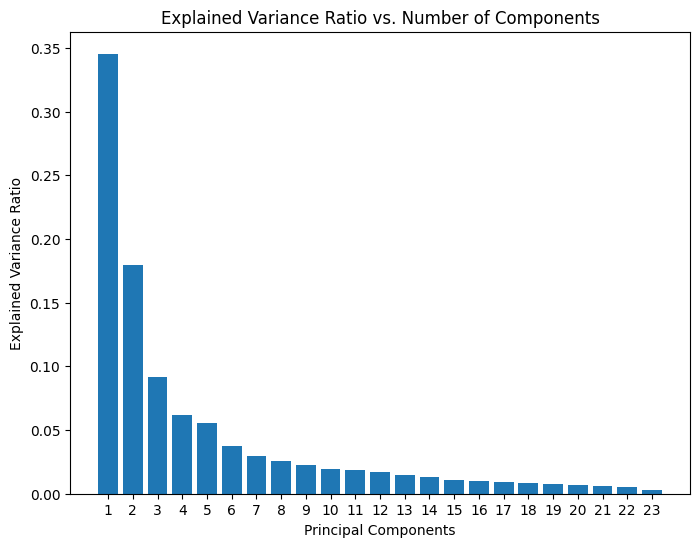

In [14]:
n_components = len(components)
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio, align='center',
        label='Individual explained variance')
plt.xticks(range(1, n_components + 1))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

therefore we are going to pick 5 components

In [15]:
#TODO
total_variance_ratio = np.sum(explained_variance_ratio[:5])
print(total_variance_ratio)

0.7342383069254743


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [16]:
df_transformed = pd.DataFrame(X_transformed[:, :5])
df_combined = pd.concat([df_transformed, non_numeric_df], axis=1)
df_combined.head()

,0,1,2,3,4,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName
0,-2.638414,-1.702512,1.283725,3.759546,2.413650,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN
1,-2.537931,-1.550464,1.279816,3.634065,2.492683,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN
2,-3.751335,-2.080190,2.067932,3.668154,2.457203,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN
3,2.000578,-1.361858,-0.395834,2.432792,0.887796,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN
4,1.582713,-1.321484,-0.238444,2.597599,1.286317,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

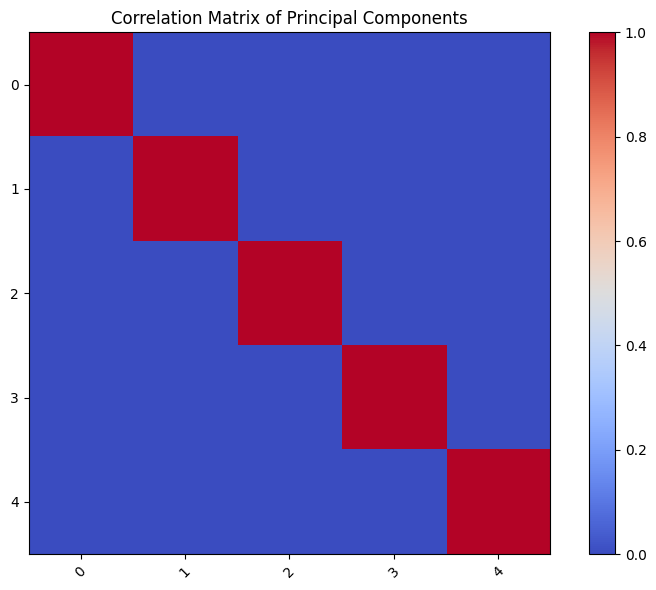

In [17]:
correlation_matrix = df_transformed.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of Principal Components')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [18]:
# TODO get eigenvectors
components = pca.get_components()

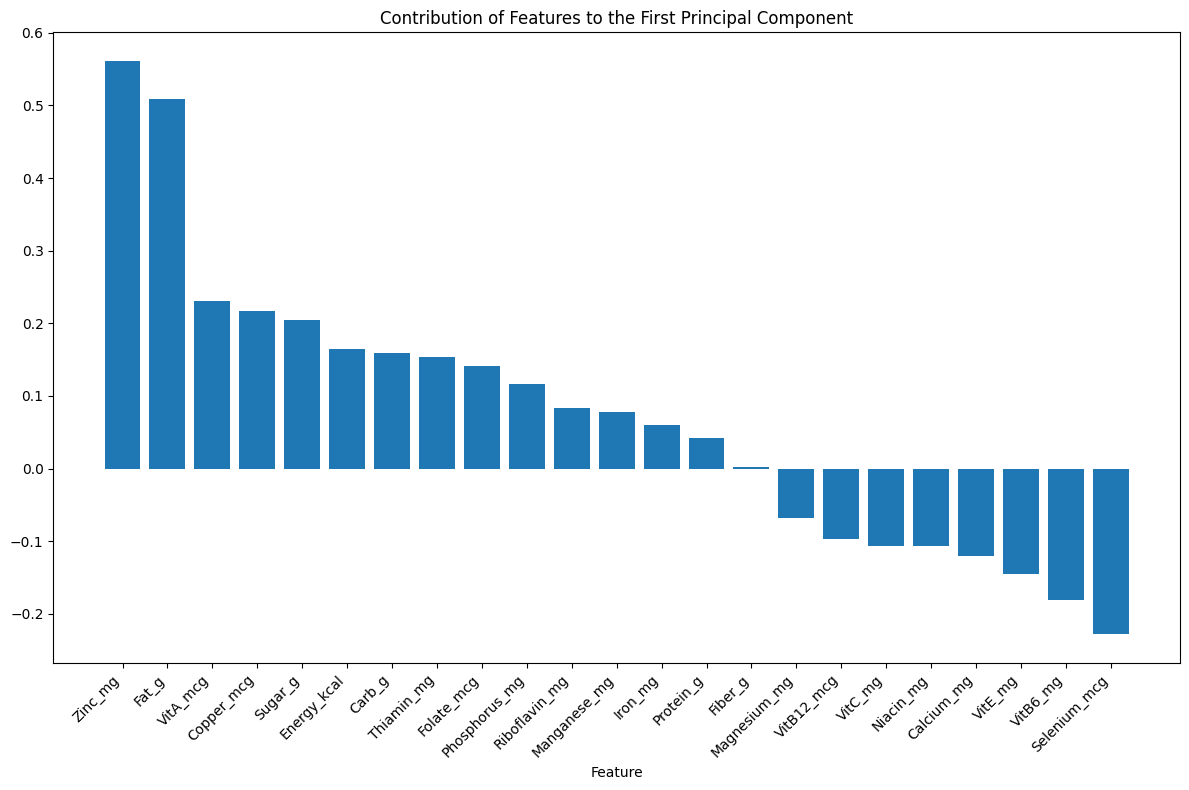

In [19]:
first_component_loadings = components[0]
features = [x[:-9] for x in df_standardized.columns]
loadings_df = pd.DataFrame({'Feature': features, 'Loading': first_component_loadings})

loadings_df_sorted = loadings_df.sort_values(by='Loading', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(loadings_df_sorted['Feature'], loadings_df_sorted['Loading'])
plt.title('Contribution of Features to the First Principal Component')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

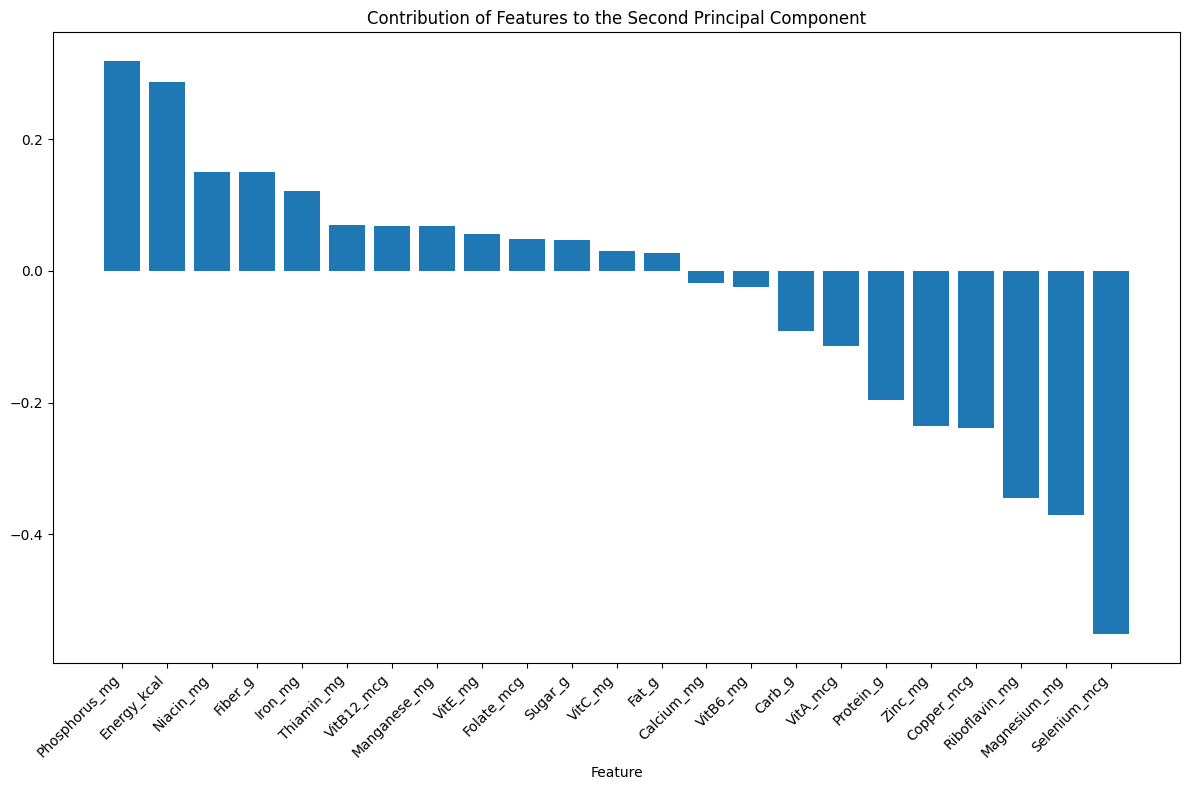

In [20]:
second_component_loadings = components[1]
features = [x[:-9] for x in df_standardized.columns]
loadings_df = pd.DataFrame({'Feature': features, 'Loading': second_component_loadings})

loadings_df_sorted = loadings_df.sort_values(by='Loading', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(loadings_df_sorted['Feature'], loadings_df_sorted['Loading'])
plt.title('Contribution of Features to the Second Principal Component')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">YOUR ANSWER</span>
The first principal component (PC1) is driven by high positive contributions from Zinc and Fat and negative contributions from VitB6 and Selenium, while the second principal component (PC2) is influenced by positive contributions from Phosphorus and Energy and negative contributions from Selenium and Magnesium, highlighting distinct data patterns related to these features.


### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

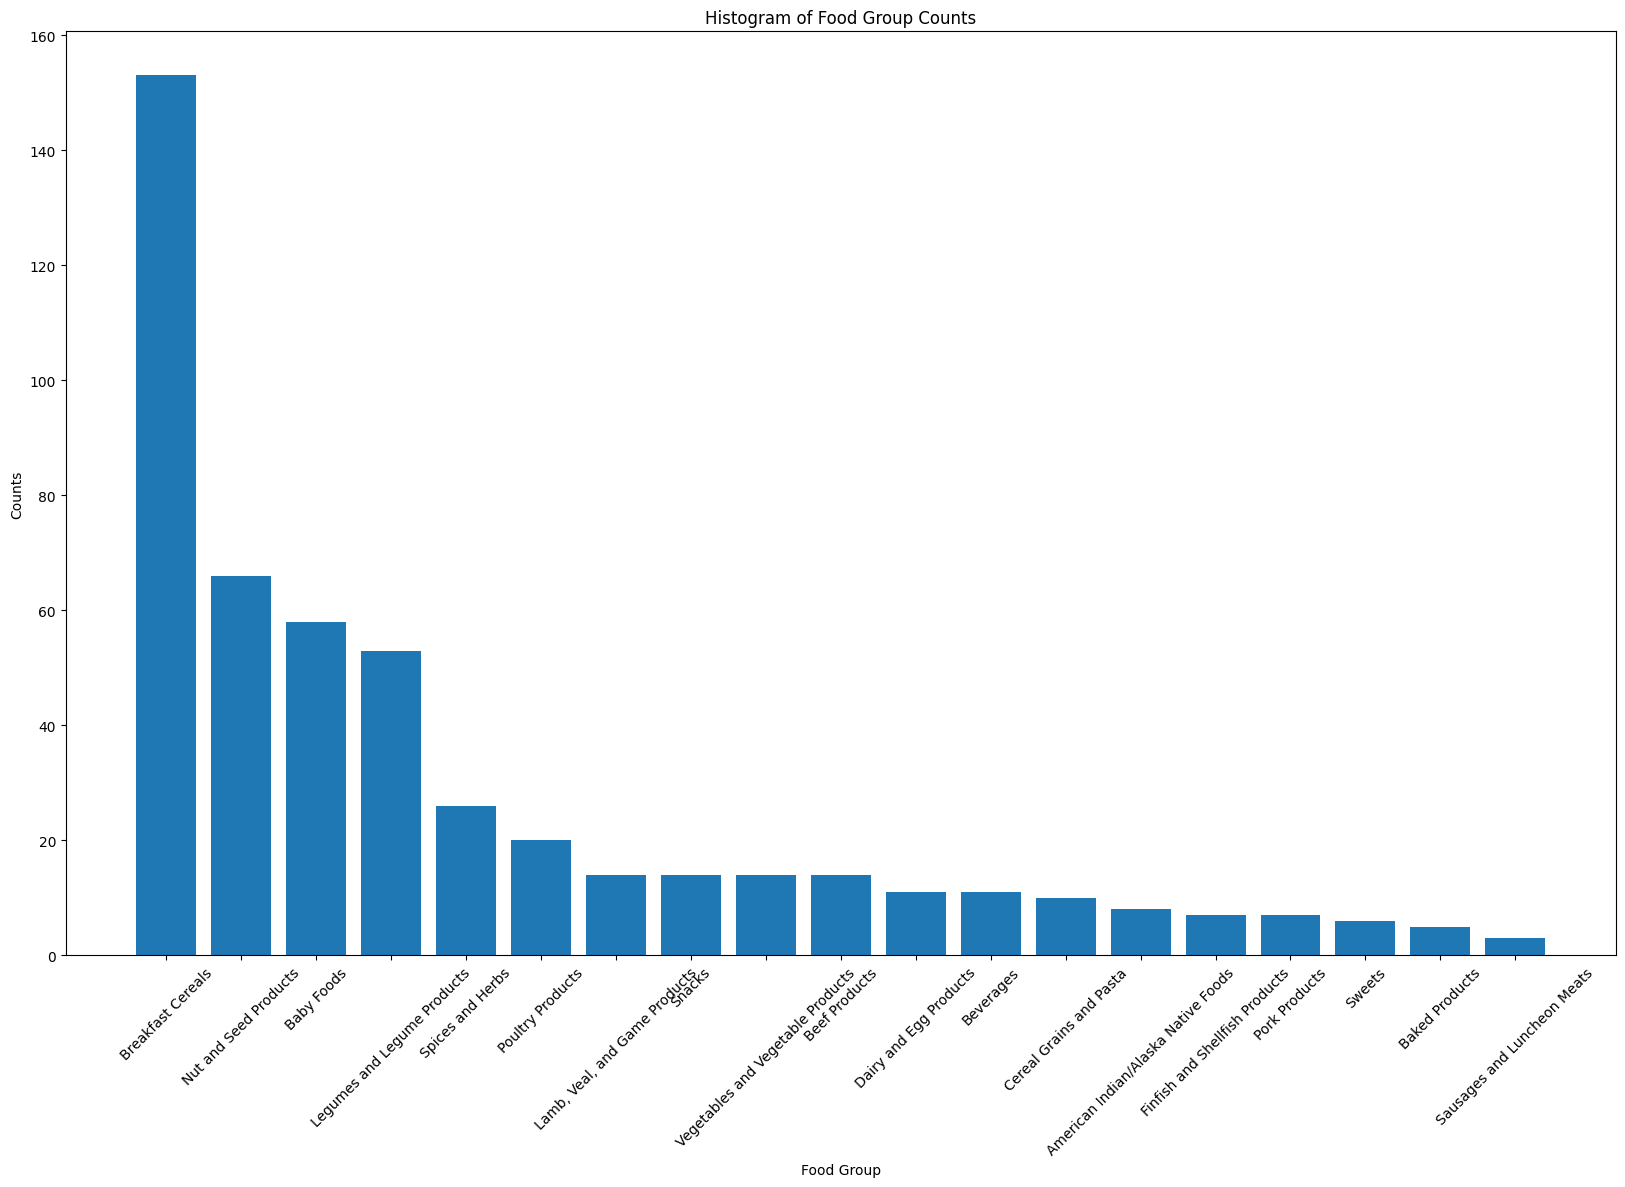

In [21]:
fg_df = df_combined.nlargest(500, df_transformed.columns[0]).groupby("FoodGroup").size().reset_index(name="Counts").sort_values(by=['Counts'], ascending=False)
plt.figure(figsize=(20, 12))
plt.bar(fg_df['FoodGroup'], fg_df['Counts'])
plt.xlabel('Food Group')
plt.ylabel('Counts')
plt.title('Histogram of Food Group Counts')
plt.xticks(rotation=45)
plt.show()


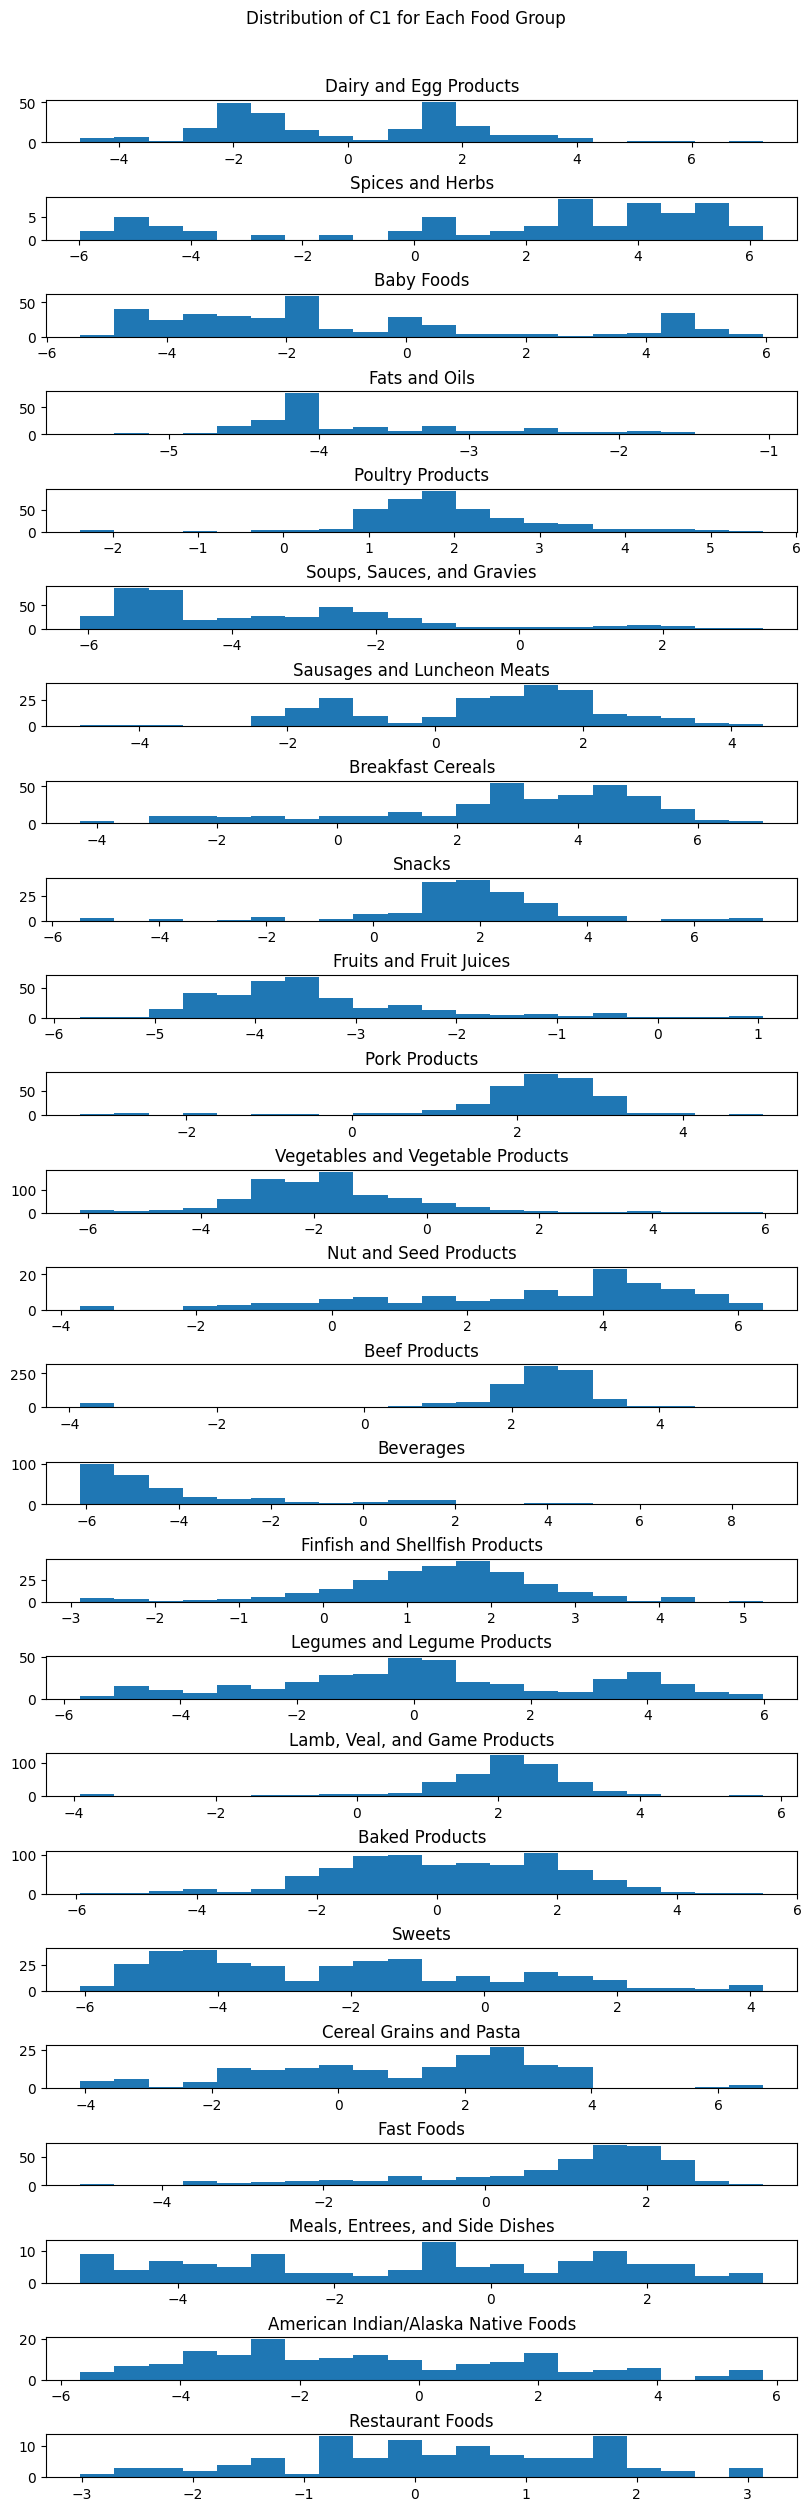

In [22]:
df = df_combined.iloc[:, [0, 6]]

unique_food_groups = df["FoodGroup"].unique()
num_food_groups = len(unique_food_groups)

fig, axs = plt.subplots(num_food_groups, 1, figsize=(8, num_food_groups), constrained_layout=True)

for i, food_group in enumerate(unique_food_groups):
    group_data = df[df['FoodGroup'] == food_group][0]
    axs[i].hist(group_data, bins=20)
    axs[i].set_title(food_group)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

fig.suptitle("Distribution of C1 for Each Food Group\n\n")
plt.show()

Do the same for pca2.

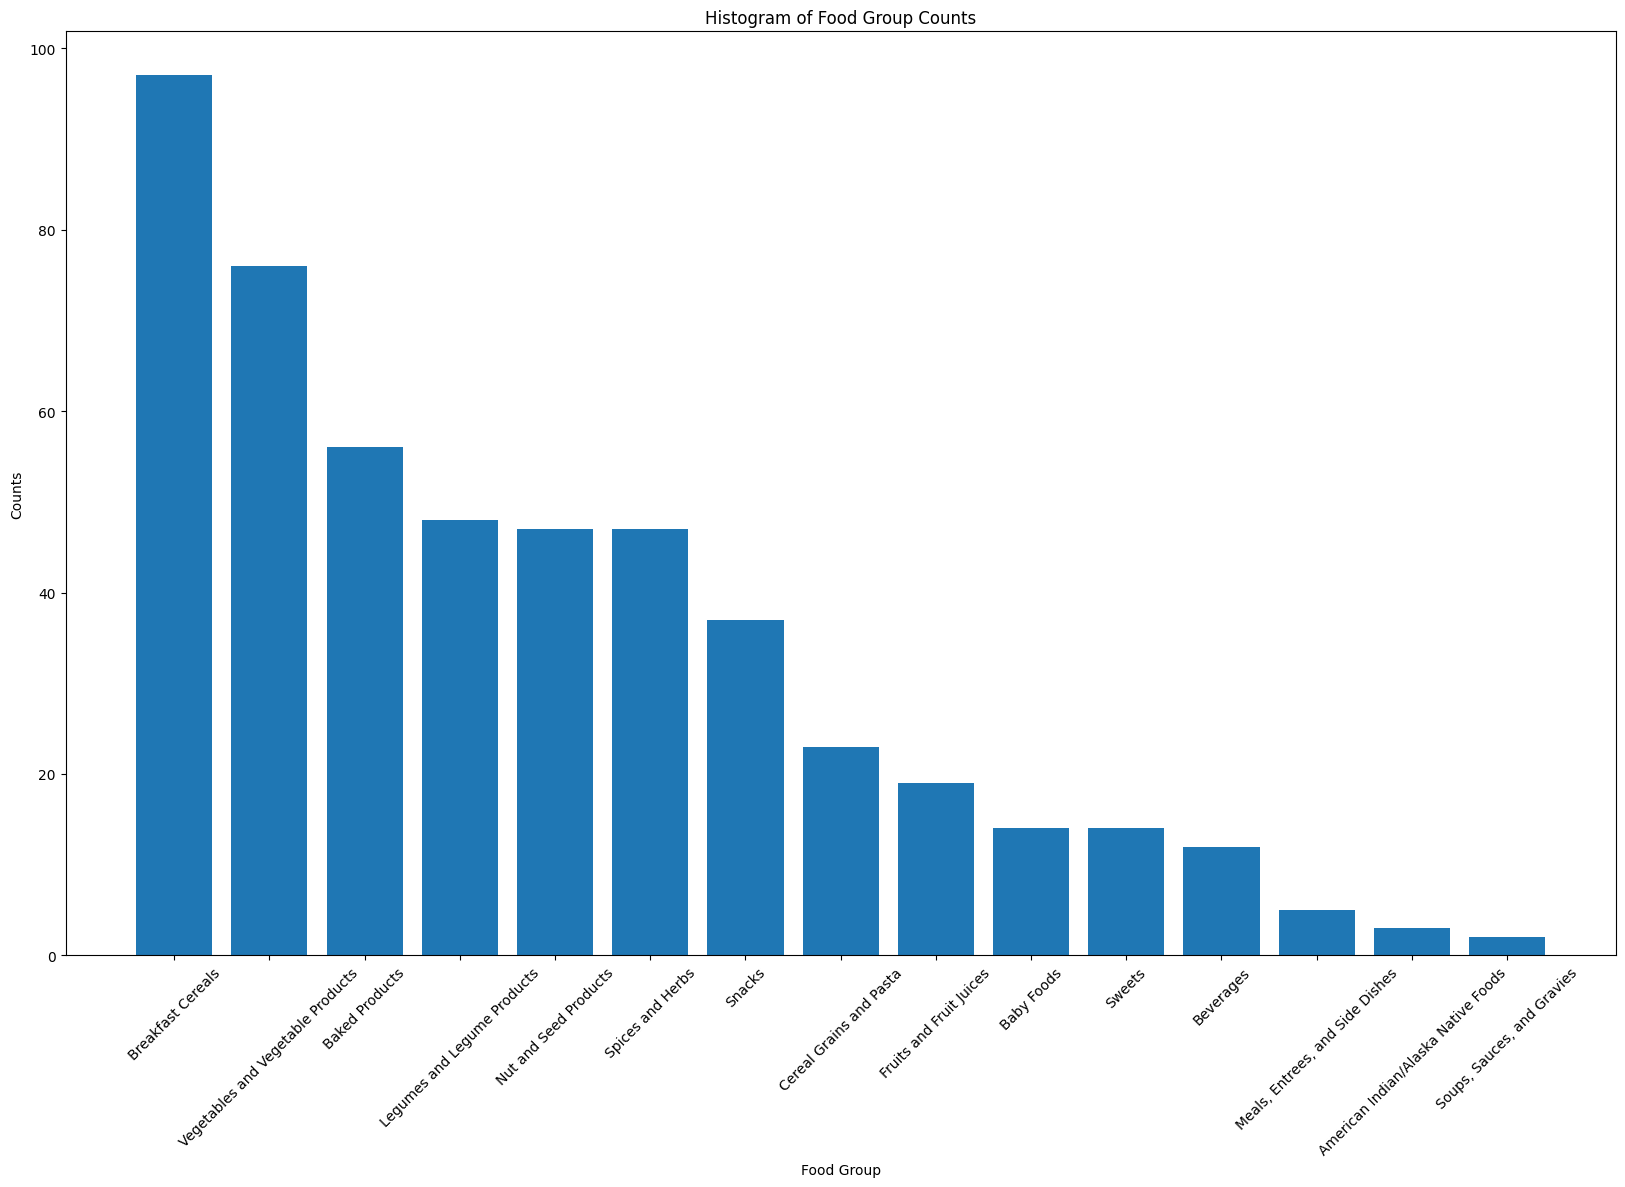

In [23]:
fg_df = df_combined.nlargest(500, df_transformed.columns[1]).groupby("FoodGroup").size().reset_index(name="Counts").sort_values(by=['Counts'], ascending=False)
plt.figure(figsize=(20, 12))
plt.bar(fg_df['FoodGroup'], fg_df['Counts'])
plt.xlabel('Food Group')
plt.ylabel('Counts')
plt.title('Histogram of Food Group Counts')
plt.xticks(rotation=45)
plt.show()

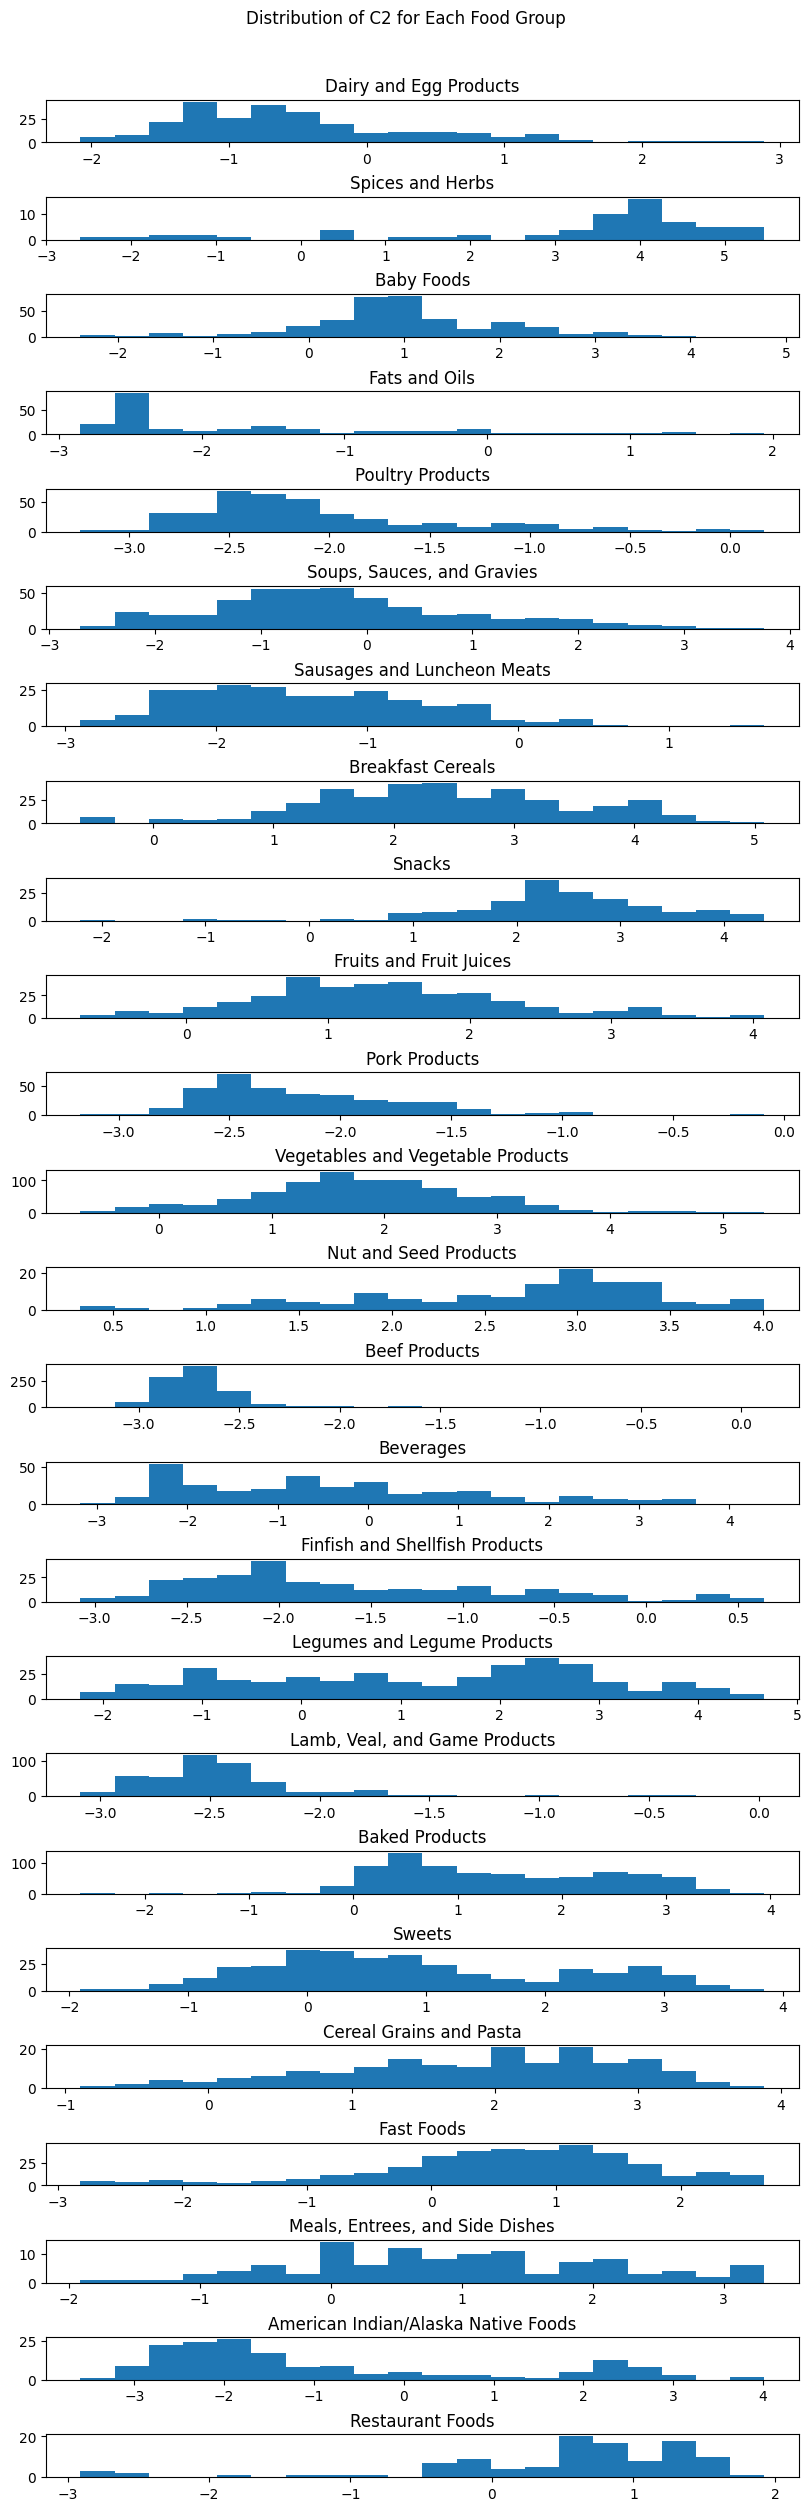

In [24]:
df = df_combined.iloc[:, [1, 6]]

unique_food_groups = df["FoodGroup"].unique()
num_food_groups = len(unique_food_groups)

fig, axs = plt.subplots(num_food_groups, 1, figsize=(8, num_food_groups), constrained_layout=True)

for i, food_group in enumerate(unique_food_groups):
    group_data = df[df['FoodGroup'] == food_group][1]
    axs[i].hist(group_data, bins=20)
    axs[i].set_title(food_group)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

fig.suptitle("Distribution of C2 for Each Food Group\n\n")
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


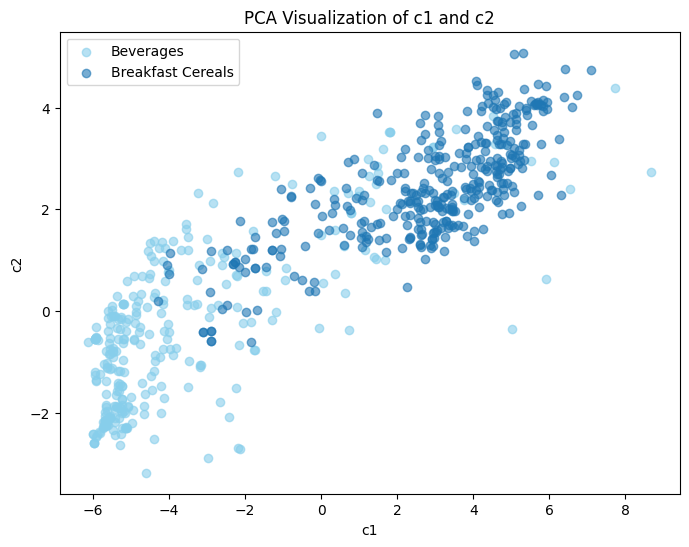

In [25]:
beverages_df = df_combined[df_combined["FoodGroup"] == "Beverages"]
breakfast_cereals_df = df_combined[df_combined["FoodGroup"] == "Breakfast Cereals"]

plt.figure(figsize=(8, 6))

plt.scatter(beverages_df[0], beverages_df[1], alpha=0.6, color="skyblue", label="Beverages")
plt.scatter(breakfast_cereals_df[0], breakfast_cereals_df[1], alpha=0.6, label="Breakfast Cereals")

plt.xlabel("c1")
plt.ylabel("c2")
plt.title("PCA Visualization of c1 and c2")
plt.legend()
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">Your Answer</span>

The distributions reveal key insights: Dominant Food Groups like Breakfast Cereal have higher PC scores, indicating a strong association with principal components (PCs). These PCs reflect the influence of nutrients from these food groups. Additionally, clustering food groups based on their PC values, such as breakfast cereals and nut and seed products in PC1, suggests similar nutrient content. Food groups centered around positive PC values are more aligned with the PCs. This distribution analysis, combined with previous eigenvector plots, shows that dominant food groups in PC1 likely contain nutrients with high loadings in PC1, such as zinc and phosphorus.

### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">Your answer</span>
The distribution plots illustrate distinct patterns: in PC1, Breakfast cereals cluster around +4, indicating a predominantly positive association, while Beverages cluster around -5, showing a predominantly negative association. Similar trends are observed in PC2, where Breakfast cereals center around +2.5 and Beverages around -2. These distributions highlight significant frequency gaps and stark differences between these food groups across both PCs, suggesting they can be clearly separated based on these dimensions. The scatterplot reinforces these findings, visually demonstrating the divergence of their distributions in the 2D space. Overall, the scatterplot and distribution plots complement each other by providing different perspectives on the data's distribution characteristics.
